# Testing if multiple convolution changes the exponents

### Full convolution is used

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas as pd
import os
import json
import glob
import scipy.stats as stats

In [2]:
sns.set()

In [20]:
times=5
signature="sq_lattice_site_percolation_periodic__entropy_order_"
flag = "L*_avg.txt_convoluted_{}times.txt".format(times)
data_root = "../data/"
fig_root  = "../figure/"

In [21]:
files = glob.glob(data_root + signature + flag)

In [22]:
files

['../data/sq_lattice_site_percolation_periodic__entropy_order_L150_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L300_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L200_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L100_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L250_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L350_avg.txt_convoluted_5times.txt',
 '../data/sq_lattice_site_percolation_periodic__entropy_order_L400_avg.txt_convoluted_5times.txt']

(10000,)
(160000,)
(40000,)
(62500,)
(90000,)
(122500,)
(22500,)


(0.5, 0.7)

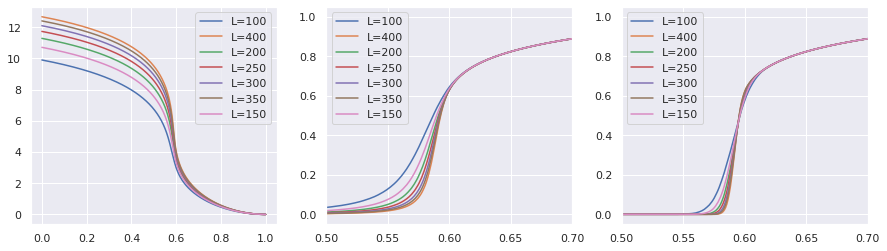

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L=int(head['length'])
        pass
    p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    print(p.shape)
    index = np.linspace(0, p.shape[0]-5, 1000, dtype=int)
    ax[0].plot(p[index], H[index], label="L={}".format(L))
    ax[1].plot(p[index], P1[index], label="L={}".format(L))
    ax[2].plot(p[index], P2[index], label="L={}".format(L))
    
    pass
# plt.legend()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[1].set_xlim([0.5, 0.7])
ax[2].set_xlim([0.5, 0.7])

In [28]:
def get_specific_heat(p, H, L):
    C = (1-p[1:])*np.diff(H)*L**2
    return -C

def get_susceptibility(p, P, L):
    return np.diff(P)*L**2

(10000,)
(160000,)
(40000,)
(62500,)
(90000,)
(122500,)
(22500,)


(0.5, 0.7)

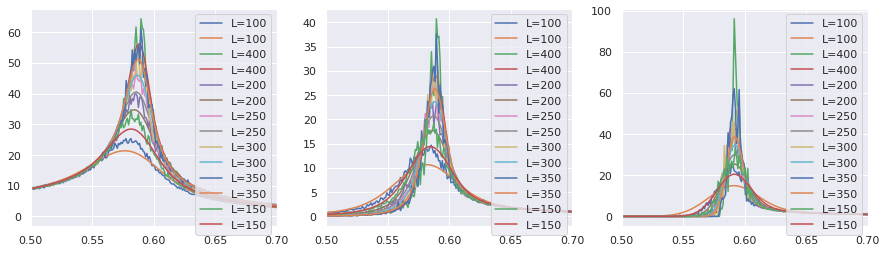

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L=int(head['length'])
        pass
    p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    print(p.shape)
    index = np.linspace(1, p.shape[0]-5, 1000, dtype=int)
    
    C = get_specific_heat(p, H, L)
    ax[0].plot(p[index], C[index], label="L={}".format(L))
    C = get_specific_heat(p, Hc, L)
    ax[0].plot(p[index], C[index], label="L={}".format(L))
    
    X = get_susceptibility(p, P1, L)
    ax[1].plot(p[index], X[index], label="L={}".format(L))
    X = get_susceptibility(p, P1c, L)
    ax[1].plot(p[index], X[index], label="L={}".format(L))
    
    X = get_susceptibility(p, P2, L)
    ax[2].plot(p[index], X[index], label="L={}".format(L))
    X = get_susceptibility(p, P2c, L)
    ax[2].plot(p[index], X[index], label="L={}".format(L))
    
    pass
# plt.legend()
# plt.xlim([0.5, 0.7])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_xlim([0.5, 0.7])
ax[1].set_xlim([0.5, 0.7])
ax[2].set_xlim([0.5, 0.7])

In [10]:
pc = 0.5927
one_by_nu=0.75
beta_by_nu=0.1041


### Chcking Order parameter and exponent beta/nu

(22500,)
(40000,)
(10000,)
(122500,)
(62500,)
(160000,)
(90000,)
../figure/sq_lattice_site_percolation_periodic__entropy_order_order-parameter_1times_fast


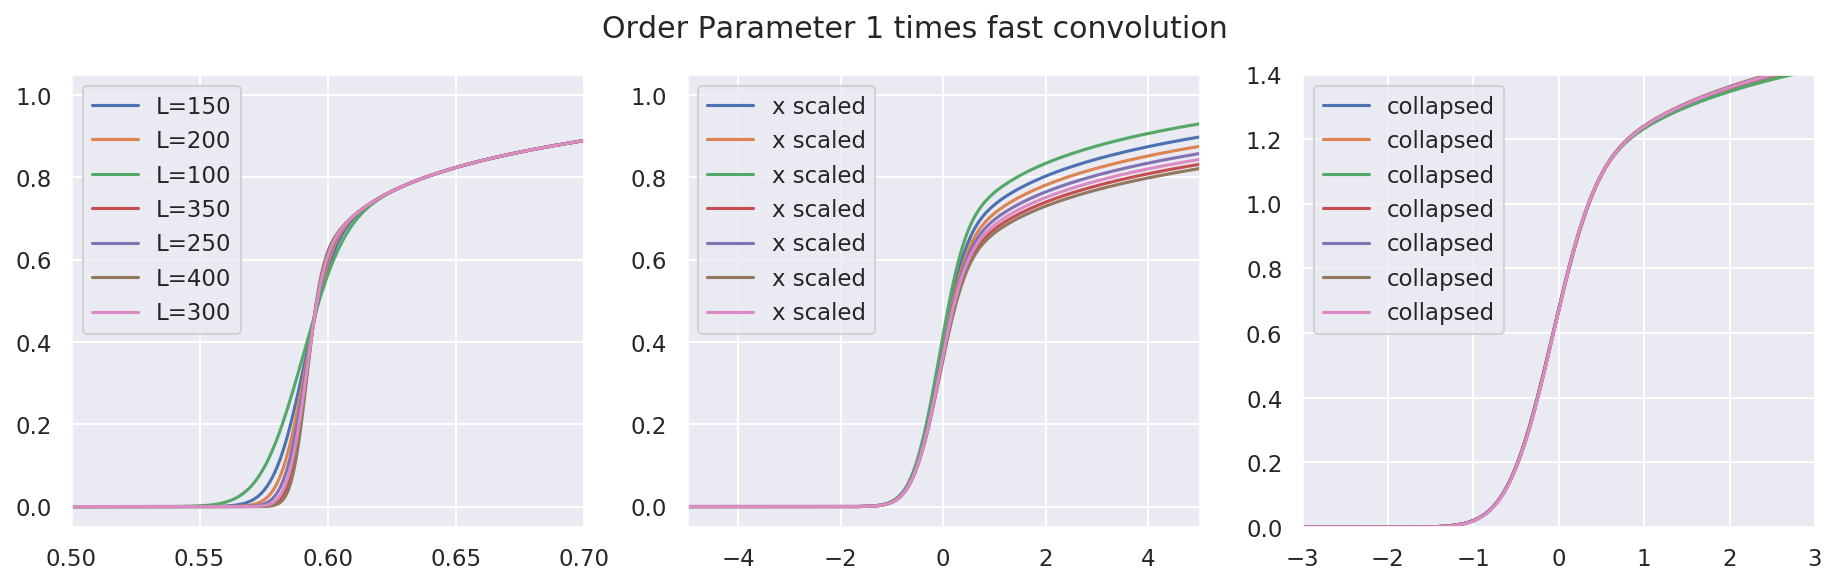

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L=int(head['length'])
        pass
    p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    print(p.shape)
    P = P2c
    index = np.linspace(0, p.shape[0]-5, 1000, dtype=int)
    ax[0].plot(p[index], P[index], label="L={}".format(L))
    ax[1].plot((p[index]-pc)*L**(one_by_nu), P[index], label="x scaled".format(L))
    ax[2].plot((p[index]-pc)*L**(one_by_nu), P[index]*L**(beta_by_nu), label="collapsed".format(L))
    
    pass

# plt.legend()
fig.suptitle("Order Parameter {} times convolution".format(times))
ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([0.5, 0.7])
ax[1].set_xlim([-5, 5])
ax[2].set_xlim([-3, 3])
ax[2].set_ylim([0, 1.4])
filename=fig_root + signature + "order-parameter_{}times".format(times)
print(filename)
# plt.savefig(filename)

### finding exponent beta

#### using visual 

(160000,)
selected point  (0.19957353912781545, 0.4690296789)
(90000,)
selected point  (0.19943575018459953, 0.484640524)
(40000,)
selected point  (0.19943609613543872, 0.5036246969)
(22500,)
selected point  (0.19859068114384965, 0.520291648)
(62500,)
selected point  (0.19942894194771058, 0.4933894498)
(10000,)
selected point  (0.199223492590607, 0.5447160975)
(122500,)
selected point  (0.19965169058261217, 0.4772605185)
x=  0.2  beta= -0.14104398629533815  stderr= 0.001767043916674085
(160000,)
(90000,)
(40000,)
(22500,)
(62500,)
(10000,)
(122500,)


(-5, 5)

/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


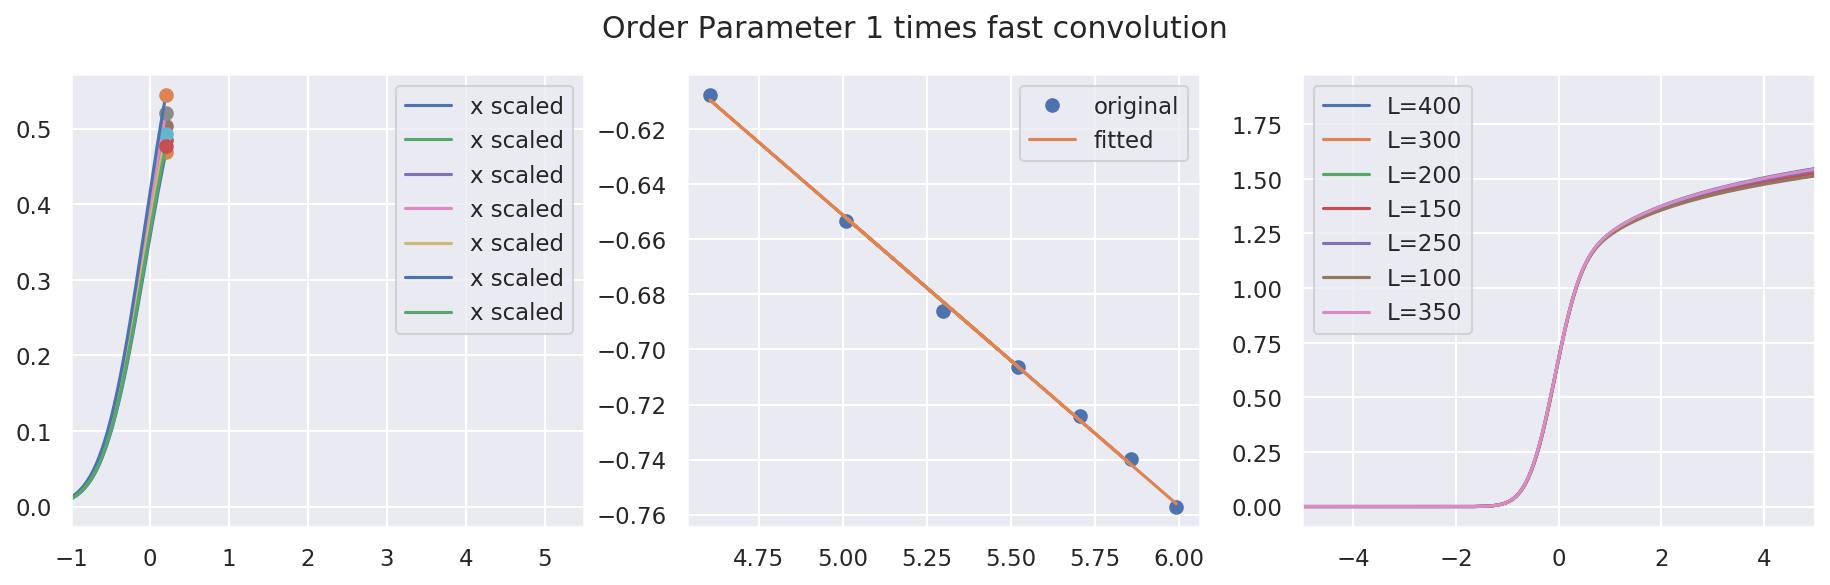

In [11]:
x_dist = 0.2

fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
length_height=[]
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L=int(head['length'])
        pass
    p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    print(p.shape)
    P = P2c
    
    x = (p-pc)*L**(one_by_nu)
    index = x < x_dist
    y = P
    ax[0].plot(x[index], y[index], label="x scaled".format(L))
    selected = (x[index][-1], y[index][-1])
    print("selected point ", selected)
    ax[0].plot(selected[0], selected[1], 'o')
    length_height.append([])
    length_height[-1].append(L)
    length_height[-1].append(selected[1])
    pass

length_height = np.log(length_height)
ax[1].plot(length_height[:,0], length_height[:,1], 'o', label='original')

regress = stats.linregress(length_height[:,0], length_height[:,1])
exponent_beta = regress[0]/one_by_nu
error = regress[-1]
print("x= ", x_dist, " beta=", exponent_beta, " stderr=", error)

ax[1].plot(length_height[:,0], length_height[:,0]*regress[0]+regress[1], label='fitted')
# ax[1].text(2,2, "x={}, beta={:.4f}, error={:.4f}".format(x_dist, exponent_beta, error))



for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L=int(head['length'])
        pass
    p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    print(p.shape)
    P = P2c
    
    x = (p-pc)*L**(one_by_nu)
    index = np.linspace(0, x.shape[0]-5, 1000, dtype=int)
    y = P*L**(-regress[0])
    ax[2].plot(x[index], y[index], label="L={}".format(L))
    
    pass



# plt.legend()
fig.suptitle("Order Parameter {} times convolution".format(times))
ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([-1, 5.5])
# ax[1].set_xlim([-5, 5])
ax[2].set_xlim([-5, 5])

# ax[2].set_ylim([0, 1.4])

#### Non visual

In [12]:

x_dist = 0.5

def find_exponent(x_dist):
    length_height=[]
    for file in files:
        with open(file) as f:
            line = f.readline()
            head = json.loads(line[1:])
            L=int(head['length'])
            pass
        p, H, Hc, P1, P1c, P2, P2c = np.loadtxt(file, unpack=True)
    #     print(p.shape)
        P = P2c

        x = (p-pc)*L**(one_by_nu)
        index = x < x_dist
        y = P

        selected = (x[index][-1], y[index][-1])
    #     print("selected point ", selected)

        length_height.append([])
        length_height[-1].append(L)
        length_height[-1].append(selected[1])
        pass

    length_height = np.log(length_height)

    regress = stats.linregress(length_height[:,0], length_height[:,1])
    exponent_beta = regress[0]/one_by_nu
    error = regress[-1]
    print("x= ", x_dist, " beta=", exponent_beta, " stderr=", error)

In [13]:
# find_exponent(4.0)

In [23]:
for x_dist in np.linspace(0.07, 2.0, 7):
    find_exponent(x_dist)

x=  0.07  beta= -0.12691042350850293  stderr= 0.0017649894629729798
x=  0.39166666666666666  beta= -0.11372090867162471  stderr= 0.0009292543558921504
x=  0.7133333333333334  beta= -0.1207075629207498  stderr= 0.0005167956716908699
x=  1.035  beta= -0.1269829180623739  stderr= 0.00042695012329110806
x=  1.3566666666666667  beta= -0.1286694611291343  stderr= 0.00038379230580921057
x=  1.6783333333333335  beta= -0.12813305153649382  stderr= 0.00043334711934961623
x=  2.0  beta= -0.12732296178782632  stderr= 0.00042235921812802446


In [99]:
5/36

0.1388888888888889